In [1]:
## IMPORTS

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## DATA LOADING AND UNDERSTANDING

In [2]:
final_test = pd.read_csv('test_data.csv')
final_test.head()

eventTimestamp unitDisplayType brandName                bundleId  \
0   1657758857892        rewarded   Generic        com.loop.match3d   
1   1657210707978    interstitial   Generic        com.loop.match3d   
2   1657392939412    interstitial  Motorola  com.YayySAL.DodgeAgent   
3   1657386816882    interstitial    Huawei   com.tintash.nailsalon   
4   1657211600823          banner   Generic   com.tilegarden.match3   

  appVersion      correctModelName countryCode     deviceId  osAndVersion  \
0  1245.35.0      Android 4 Tablet          US  6a0a94554cf   Android-4.0   
1  1245.35.0           Android 4.0          ZA  6a0b0e59f45   Android-4.0   
2    13.0.02  Moto g(8) power lite          BR  6a0fa820c46  Android-10.0   
3      1.3.6           JDN2-AL00HN          IQ  6a142bdbea2   Android-9.0   
4     1.8.52           Android 4.0          US  6a16943a771   Android-4.0   

  connectionType   c1   c2  c3   c4      size mediationProviderVersion  \
0             3G  7b8  2.0  6b  2.0  768x1024                   11.4.3   
1           WIFI  8bd  8.0  6b  6.0   320x480                   11.4.3   
2           WIFI  ea0  8.0  6b  9.0   320x480                   11.0.0   
3           WIFI  3dc  6.0  6b  4.0  768x1024                   11.3.3   
4           WIFI  cb2  7.0  6b  5.0    320x50                   11.4.3   

   bidFloorPrice  sentPrice  
0           0.05       0.06  
1           0.01       0.16  
2           0.05       0.06  
3           0.01       0.05  
4           0.01       0.03

In [3]:
train = pd.read_csv('train_data.csv')
train.head(100)

eventTimestamp unitDisplayType brandName               bundleId  \
0    1656411567773          banner        LG  com.tilegarden.match3   
1    1656925395488          banner   Generic       com.loop.match3d   
2    1656913751642          banner   Generic       com.loop.match3d   
3    1656656319103          banner   Generic       com.loop.match3d   
4    1657429389462    interstitial      OPPO       com.loop.match3d   
..             ...             ...       ...                    ...   
95   1656588029617          banner   Samsung       com.loop.match3d   
96   1656767486684          banner     Apple             1502447854   
97   1656975344905          banner   Samsung       com.loop.match3d   
98   1657680588197          banner   Generic       com.loop.match3d   
99   1657121886886          banner   Generic       com.loop.match3d   

   appVersion correctModelName countryCode     deviceId   osAndVersion  \
0      1.8.22          LM-V405          US  74f9b473fad   Android-10.0   
1   1245.34.0      Android 4.0          FR  6ad4c88b84e    Android-4.0   
2   1245.35.0      Android 4.0          US  743b9849642    Android-4.0   
3   1245.34.0      Android 4.0          GB  6ad933115b2    Android-4.0   
4   1245.35.0          CPH2127          ID  809f9785bb3   Android-11.0   
..        ...              ...         ...          ...            ...   
95  1245.34.0        SM-N960U1          US  6adb6e6eeb9  Android-8.1.0   
96  1245.33.4           iPhone          RU  6a8e54b1fa4       iOS-14.1   
97  1245.34.0          SM-T500          US  7476d601e7f   Android-11.0   
98  1245.35.0      Android 4.0          US  740f8afaadc    Android-4.0   
99  1245.35.0     Android 11.0          US  74e192b2780   Android-11.0   

   connectionType   c1   c2  c3   c4     size mediationProviderVersion  \
0              3G  cb2  6.0  6b  4.0   320x50                   11.2.1   
1            WIFI  7d3  6.0  6b  6.0   320x50                   11.4.2   
2            WIFI  7d3  3.0  6b  3.0   320x50                   11.4.3   
3            WIFI  7d3  3.0  6b  5.0   320x50                   11.4.2   
4            WIFI  8bd  3.0  6b  3.0  320x480                   11.4.3   
..            ...  ...  ...  ..  ...      ...                      ...   
95           WIFI  7d3  2.0  6b  7.0   320x50                   11.4.2   
96        UNKNOWN  59b  2.0  79  2.0   320x50                   11.4.1   
97           WIFI  7d3  5.0  6b  6.0   728x90                   11.4.2   
98           WIFI  7d3  1.0  6b  9.0   320x50                   11.4.3   
99           WIFI  7d3  3.0  6b  1.0   728x90                   11.4.3   

    bidFloorPrice  sentPrice  winBid  has_won  
0            0.01       0.02    0.88        0  
1            0.01       0.03    0.08        0  
2            0.01       0.02    1.72        0  
3            0.01       0.06    0.21        0  
4            0.01       0.16    1.91        0  
..            ...        ...     ...      ...  
95           0.01       0.41    0.83        0  
96           0.01       0.05    0.09        0  
97           0.01       0.03    1.94        0  
98           0.10       0.30    0.37        0  
99           0.01       0.03    4.85        0  

[100 rows x 20 columns]

splitting the data into won and lost bids
in the lost bids, we don't know the characteristics of the winning bid
we shouldn't predict win proce based on lost bids then

In [4]:
won_bids = train[train.has_won==1]
lost_bids = train[train.has_won!=1]


In [5]:
np.mean(won_bids['sentPrice']==won_bids['winBid'])

1.0

in all the won bids the sent price is equal to winning price

In [6]:
np.mean(lost_bids['sentPrice']==lost_bids['winBid'])

0.043168890585644375

it is so also in some lost bids

In [7]:
lost_bids[lost_bids['sentPrice']==lost_bids['winBid']].head()

eventTimestamp unitDisplayType brandName               bundleId  \
18   1657046333287          banner    Huawei       com.loop.match3d   
37   1657064366646          banner   Generic       com.loop.match3d   
40   1657570914549          banner    Huawei  com.tilegarden.match3   
44   1657291935975          banner   Generic       com.loop.match3d   
51   1657104270785          banner   Samsung       com.loop.match3d   

   appVersion correctModelName countryCode     deviceId   osAndVersion  \
18  1245.35.0          DUB-LX3          CL  74c36e985f6  Android-8.1.0   
37  1245.35.0      Android 4.0          BE  80436d4bfc2    Android-4.0   
40     1.8.55         MAR-LX1A          DE  6a02a95ec05   Android-10.0   
44  1245.35.0      Android 4.0          KR  74f18071290    Android-4.0   
51  1245.33.0         SM-M022F          SG  6aa799887ed   Android-11.0   

   connectionType   c1   c2  c3   c4    size mediationProviderVersion  \
18           WIFI  7d3  3.0  6b  2.0  320x50                   11.4.3   
37           WIFI  7d3  6.0  6b  6.0  320x50                   11.4.3   
40             3G  cb2  5.0  6b  5.0  320x50                   11.4.3   
44           WIFI  7d3  4.0  6b  6.0  320x50                   11.4.3   
51             3G  7d3  8.0  6b  1.0  320x50                   11.3.3   

    bidFloorPrice  sentPrice  winBid  has_won  
18           0.01       0.04    0.04        0  
37           0.01       0.14    0.14        0  
40           0.01       0.03    0.03        0  
44           0.01       0.01    0.01        0  
51           0.01       0.03    0.03        0

however, in the lost bids we don't know the characteristics of the winning bid, so adding lost bids would be misleading

## EDA

In [8]:
# splitting data into train, test, validation

In [9]:
seed = 9876

In [10]:
train, test = train_test_split(won_bids, random_state = seed, test_size=0.3)


In [11]:
train.shape, test.shape

((568734, 20), (243744, 20))

In [12]:
train.dtypes

eventTimestamp                int64
unitDisplayType              object
brandName                    object
bundleId                     object
appVersion                   object
correctModelName             object
countryCode                  object
deviceId                     object
osAndVersion                 object
connectionType               object
c1                           object
c2                          float64
c3                           object
c4                          float64
size                         object
mediationProviderVersion     object
bidFloorPrice               float64
sentPrice                   float64
winBid                      float64
has_won                       int64
dtype: object

In [13]:
train.columns

Index(['eventTimestamp', 'unitDisplayType', 'brandName', 'bundleId',
       'appVersion', 'correctModelName', 'countryCode', 'deviceId',
       'osAndVersion', 'connectionType', 'c1', 'c2', 'c3', 'c4', 'size',
       'mediationProviderVersion', 'bidFloorPrice', 'sentPrice', 'winBid',
       'has_won'],
      dtype='object')

### Dependent variable

<Axes: >

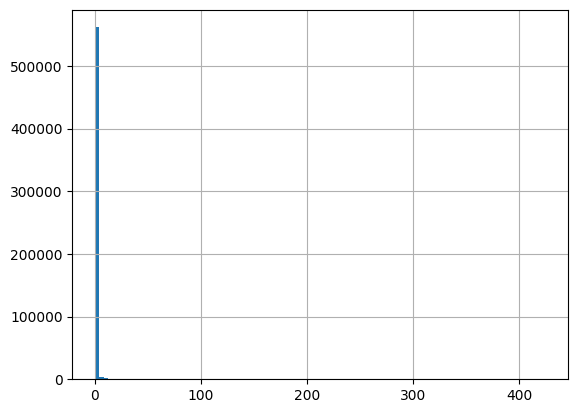

In [14]:
train['winBid'].hist( bins = 100)

the data are enormously skewed
let's look at percentile distribution

In [15]:
train['winBid'].quantile([.9,.95,.975, .99, .995])

0.900     0.39
0.950     0.92
0.975     1.87
0.990     5.67
0.995    10.03
Name: winBid, dtype: float64

data limited to max 1 looks better

<Axes: >

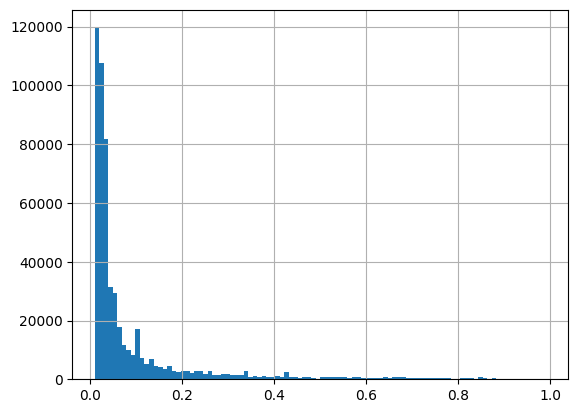

In [16]:
train[train['winBid']<1]['winBid'].hist( bins = 100)

let's take a look at extreme values to check if they are assosciated with a particlar value of a explanatory variable

In [17]:
train['extreme_value'] = np.where(train['winBid']>= 1, 1, 0)

In [18]:
features = ['unitDisplayType', 'brandName', 'bundleId',
       'appVersion', 'correctModelName', 'countryCode', 'deviceId',
       'osAndVersion', 'connectionType', 'c1', 'c2', 'c3', 'c4', 'size',
       'mediationProviderVersion']

In [19]:
for f in features:  
    feature_name=f
    df=pd.DataFrame({feature_name : train[feature_name], 'extreme_value': train['extreme_value']})
    df=df.groupby(feature_name).agg({'extreme_value': 'mean'})
    print(feature_name)
    print(df.sort_values(by = 'extreme_value', ascending = False))

unitDisplayType
                 extreme_value
unitDisplayType               
rewarded              0.710714
interstitial          0.662371
banner                0.026225
brandName
           extreme_value
brandName               
Sylvania             1.0
HP                   1.0
Moxee                1.0
Winnovo              1.0
Dish                 1.0
...                  ...
Benco                0.0
BQ                   0.0
PAX                  0.0
Philco               0.0
Jio                  0.0

[107 rows x 1 columns]
bundleId
                             extreme_value
bundleId                                  
1569586264                        1.000000
1436213906                        0.922414
se.ace.fishinc                    0.552147
com.volt.dresstoimpress           0.430532
1542256628                        0.334483
1586795332                        0.239799
1579489488                        0.155140
1582745578                        0.114155
1523081624                     

they seem to be associated with some particular ad types (rewarded, interstitial) and appear on given devices
they should not be then excluded, rathr modelled separately

Now we move to analyze potential explanatory features

In [20]:
aggregates = {

}



for f in features:  
    feature_name=f
    df=pd.DataFrame({feature_name : train[feature_name], "price": train['winBid']})
    print(df.groupby(feature_name).agg(Mean_Price = ("price", np.mean),
    Min_Price = ("price", np.min),
    Max_Price = ("price", np.max),
    Number = ("price", "count" ), 
    Q10 = ("price", lambda x: x.quantile(0.10)),
    Q50 = ("price", lambda x: x.quantile(0.50)),
    Q90 = ("price", lambda x: x.quantile(0.90)),
    Q95 = ("price", lambda x: x.quantile(0.95))
            ).reset_index())
    print('Share of NAs:', np.mean(train[feature_name].isna()))


  unitDisplayType  Mean_Price  Min_Price  Max_Price  Number   Q10   Q50  \
0          banner    0.134632       0.01      61.76  550620  0.01  0.03   
1    interstitial    6.797594       0.01     425.00    6596  0.15  1.93   
2        rewarded    6.813865       0.01     425.00   11518  0.26  2.39   

     Q90     Q95  
0   0.29   0.580  
1  11.64  22.960  
2  10.88  16.286  
Share of NAs: 0.0
    brandName  Mean_Price  Min_Price  Max_Price  Number    Q10    Q50    Q90  \
0        AT&T    0.545242       0.02      10.20     124  0.050  0.200  0.939   
1        Acer    0.133567       0.01       7.11     157  0.010  0.020  0.100   
2       Advan    0.870000       0.05       2.49       4  0.068  0.470  1.992   
3      Aidata    0.060000       0.06       0.06       2  0.060  0.060  0.060   
4        Alba    0.122500       0.10       0.18       4  0.100  0.105  0.159   
..        ...         ...        ...        ...     ...    ...    ...    ...   
102   Xiaobai    1.603333       0.07       3.

deviceID, bundleID - cannot be used, as they most probably will not repeat themselves

versions of mediator, app version, model version, OS version - they can also change quite quickly, model would have to be refitted often - depends on the business
if we want to refit the model so often or not
here I will drop the models but i'll extract OS for simplicity and because of lack of time for deeper analysis

brand name, country - will keep only the largest ones, rest will be grouped to 'OTHER'

anomyzed variables - need to check if the test data doesn't have values not present here



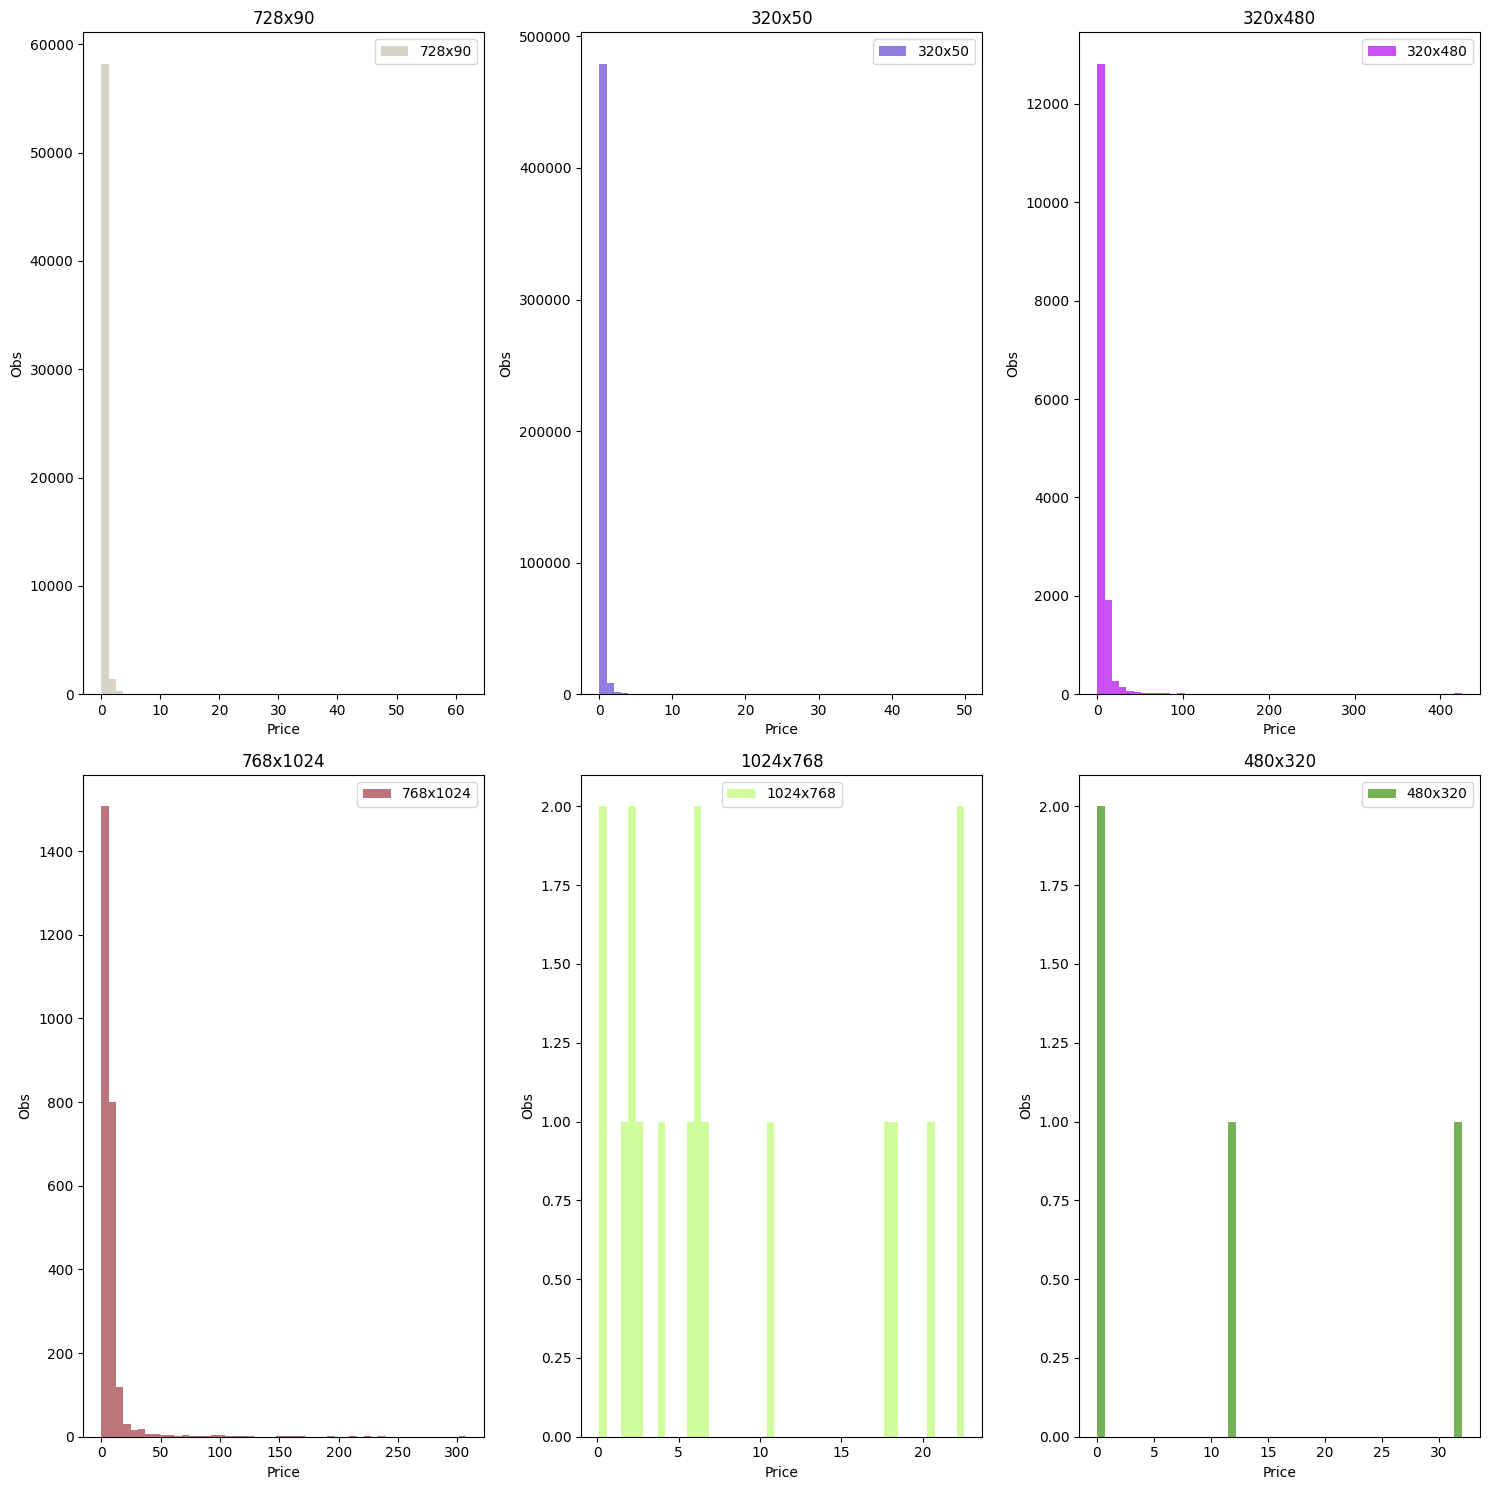

In [21]:
## Histograms of price by size
sizes = train["size"].unique()


s = len(sizes)
fig, axs = plt.subplots(2, 3, figsize=(15, 15))


for i, k in enumerate(sizes):
    data = train[train['size'] == k]['winBid']
    r = i // 3
    c = i % 3
    axs[r, c].hist(data, bins=50, alpha=0.7, label=k, color=np.random.rand(3,))
    axs[r, c].set_title(k)
    axs[r, c].set_xlabel("Price")
    axs[r, c].set_ylabel("Obs")
    axs[r, c].legend()

plt.tight_layout()
plt.show()

sizes 320x50 and 728x90 have similar distributions vs all the remaining sizes - totally different distributions
we could build two models split by these

In [22]:
features

['unitDisplayType',
 'brandName',
 'bundleId',
 'appVersion',
 'correctModelName',
 'countryCode',
 'deviceId',
 'osAndVersion',
 'connectionType',
 'c1',
 'c2',
 'c3',
 'c4',
 'size',
 'mediationProviderVersion']

In [23]:
## checking if all the levels of categorical variables from test data are present in training data
features_to_check = ['unitDisplayType',
 'brandName',
 'countryCode',
 'connectionType',
 'c1',
 'c2',
 'c3',
 'c4',
 'size',
 'mediationProviderVersion']
for f in features_to_check: 
    i=[]
    for j in set(final_test[f]):
        if j in set(train[f]):
            i.append(1)
        else:
            i.append(0)
    print(f)
    print('% of categories from test present in train')
    print(np.mean(i))
    

unitDisplayType
% of categories from test present in train
1.0
brandName
% of categories from test present in train
0.7181208053691275
countryCode
% of categories from test present in train
0.8011695906432749
connectionType
% of categories from test present in train
1.0
c1
% of categories from test present in train
1.0
c2
% of categories from test present in train
1.0
c3
% of categories from test present in train
1.0
c4
% of categories from test present in train
1.0
size
% of categories from test present in train
1.0
mediationProviderVersion
% of categories from test present in train
0.8857142857142857


Some variables have categories in the test set which are not present in the training. This could be handled by proper recoding, but we can assume there would be more inknown versions coming in the future. This could limit the usability of the model when used in production (but it's possible if needed from the business perspective). Here, due to lack of time, I drop those variables

In [24]:
### extracting OS name
train['OS']=train['osAndVersion'].str.split("-").str[0]


In [25]:
train['OS'].value_counts()

OS
Android    382022
iOS        186712
Name: count, dtype: int64

brand name, country - need recoding into largest categories + others

## Recoding

In [26]:
## RECODING BRAND NAME
print(train['brandName'].value_counts().head(20))


brandName
Apple       186712
Samsung     138371
Generic      95513
Huawei       35286
Motorola     32898
Xiaomi       29019
OPPO         13807
LG            4913
Vivo          4523
Sharp         3416
OnePlus       3299
Sony          2874
Lenovo        2743
Realme        2630
TCL           1532
Asus          1393
Wiko           888
Alcatel        753
ZTE            674
Sonim          617
Name: count, dtype: int64


In [27]:
# RECODING
kept = ['Apple', 'Samsung', 'Huawei', 'Motorola', 'Xiaomi', 'OPPO', 'Generic'] 
## recoding to infrequent makes usage of OneHotEncoder easier
recoded = 'infrequent'  


train['brandName'] = train['brandName'].apply(
    lambda x: x if x in kept else recoded
)

In [28]:
train['brandName'].value_counts()

brandName
Apple         186712
Samsung       138371
Generic        95513
infrequent     37128
Huawei         35286
Motorola       32898
Xiaomi         29019
OPPO           13807
Name: count, dtype: int64

In [29]:
### Recoding COUNTRY:

In [30]:
print(train['countryCode'].value_counts().head(20))

countryCode
GB    97557
BR    61824
US    59825
FR    57088
JP    39050
MX    37186
DE    34622
CA    25756
RU    17875
IN    13415
KR    13079
AU     7506
ES     7380
TW     6962
NL     6724
IE     6017
HK     5894
PH     5657
SG     5472
TR     5328
Name: count, dtype: int64


In [31]:
# RECODING
kept = ['GB', 'BR', 'US', 'FR', 'JP', 'MX', 'DE', 'CA', 'RU', 'IN', 'KR'] 
recoded = 'infrequent'  


train['countryCode'] = train['countryCode'].apply(
    lambda x: x if x in kept else recoded
)

In [32]:
train['countryCode'].value_counts()

countryCode
infrequent    111457
GB             97557
BR             61824
US             59825
FR             57088
JP             39050
MX             37186
DE             34622
CA             25756
RU             17875
IN             13415
KR             13079
Name: count, dtype: int64

## Time variables

In [33]:
## Generate time variables from timestamp and checking if we have corresponding values in the test data
#type(train.eventTimestamp)
train['Timestamp'] = pd.to_datetime(train.eventTimestamp, unit='ms')
final_test['Timestamp'] = pd.to_datetime(final_test.eventTimestamp, unit='ms')


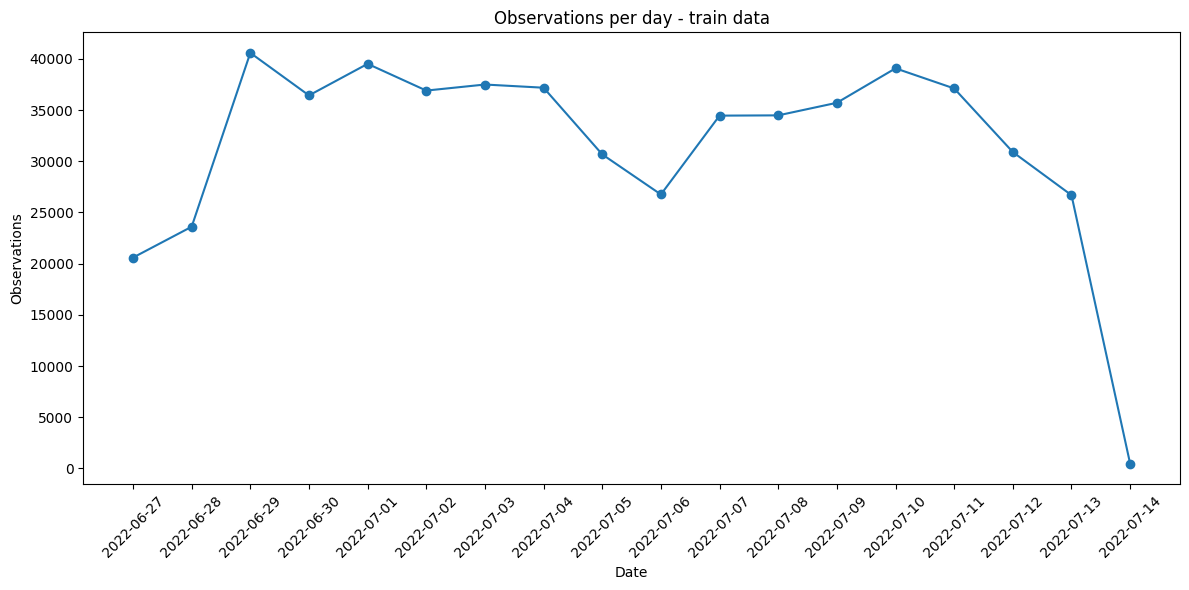

In [34]:
train['date'] = train['Timestamp'].dt.strftime("%Y-%m-%d")

observations = train.groupby(train['date'] ).size()

# Utworzenie wykresu
plt.figure(figsize=(12, 6))  # Rozmiar wykresu
plt.plot(observations.index, observations.values, marker='o', linestyle='-')
plt.title('Observations per day - train data')
plt.xlabel('Date')
plt.ylabel('Observations')
plt.xticks(rotation=45)  # Obrót o etykiety osi x, aby były czytelne

plt.tight_layout()
plt.show()

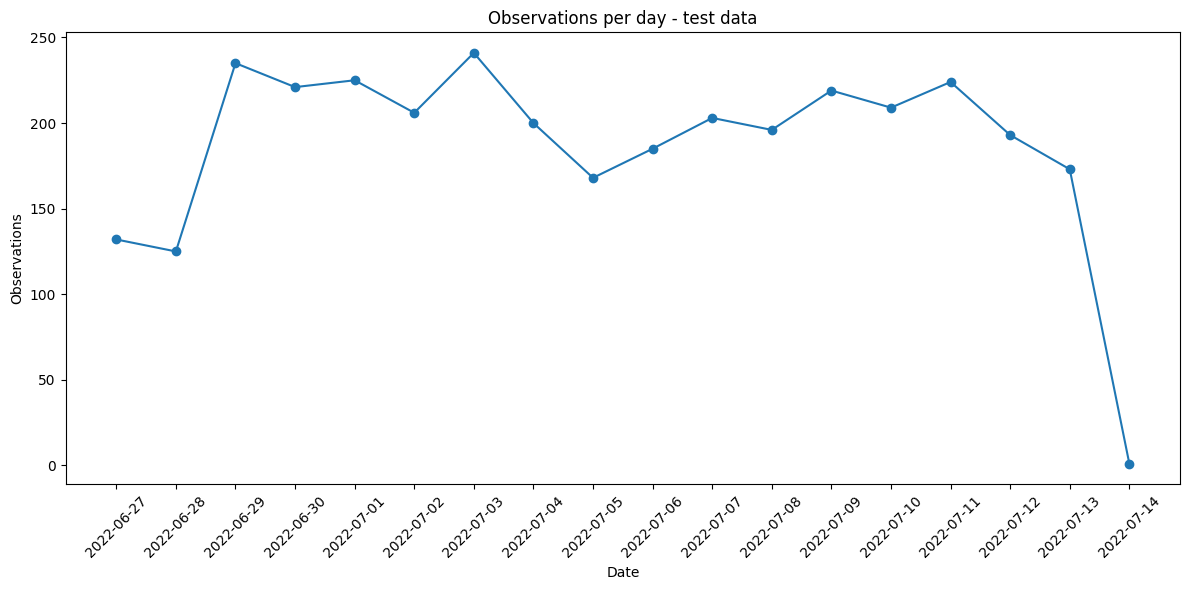

In [35]:
final_test['date'] = train['Timestamp'].dt.strftime("%Y-%m-%d")

observations = final_test.groupby(final_test['date'] ).size()


plt.figure(figsize=(12, 6))  
plt.plot(observations.index, observations.values, marker='o', linestyle='-')
plt.title('Observations per day - test data')
plt.xlabel('Date')
plt.ylabel('Observations')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

we have only a few days of data with the 14th of July being only partially present.there is no sense in including month, days, week numbers etc in the model


In [36]:
#DOW -
train['Timestamp'].dt.strftime("%A").value_counts(), final_test['Timestamp'].dt.strftime("%A").value_counts()

(Timestamp
 Monday       94904
 Wednesday    94051
 Tuesday      85190
 Sunday       76588
 Friday       74014
 Saturday     72631
 Thursday     71356
 Name: count, dtype: int64,
 Timestamp
 Wednesday    10564
 Tuesday       6643
 Monday        6135
 Sunday        5266
 Saturday      4725
 Thursday      4192
 Friday        4061
 Name: count, dtype: int64)

In [37]:
# HOUR
train['Timestamp'].dt.hour.value_counts(), final_test['Timestamp'].dt.hour.value_counts()

(Timestamp
 21    29433
 20    29258
 19    27977
 15    27625
 22    27576
 14    27315
 13    27234
 16    26804
 18    26690
 17    26323
 23    25511
 12    25489
 0     24300
 11    23445
 1     22746
 10    20749
 9     20429
 8     19406
 7     19303
 2     19196
 3     18658
 4     18388
 5     17665
 6     17214
 Name: count, dtype: int64,
 Timestamp
 20    2213
 19    2136
 16    2111
 18    2095
 17    2061
 14    1996
 15    1990
 21    1954
 13    1948
 22    1944
 23    1860
 0     1768
 12    1723
 2     1591
 1     1567
 11    1533
 3     1527
 4     1502
 10    1416
 5     1367
 6     1366
 9     1323
 7     1307
 8     1288
 Name: count, dtype: int64)

In [38]:
train['size'].value_counts()

size
320x50      490525
728x90       60095
320x480      15550
768x1024      2543
1024x768        17
480x320          4
Name: count, dtype: int64

In [39]:
# RECODING
kept = ['320x50', '728x90' ] 
recoded = 'infrequent'  


train['size'] = train['size'].apply(
    lambda x: x if x in kept else recoded
)

In [40]:
train['size'].value_counts()

size
320x50        490525
728x90         60095
infrequent     18114
Name: count, dtype: int64

#### WRAP UP FUNCTION TO USE ON TEST DATA:

In [41]:

def prepare_data(df):
    kept = ['320x50', '728x90' ] 
    recoded = 'infrequent'  
    df['size'] = df['size'].apply(lambda x: x if x in kept else recoded)
    df['Timestamp'] = pd.to_datetime(df.eventTimestamp, unit='ms')
    df['DOW'] = df['Timestamp'].dt.strftime("%A")
    df['hour'] = df['Timestamp'].dt.hour
    df['OS']=df['osAndVersion'].str.split("-").str[0]
    
    return df

In [42]:
train=prepare_data(train)
test=prepare_data(test)

### SUMMARY:
We have the following variables to be used in the model:

Categorical:
* 'unitDisplayType',
*  'brandName' (recoded),
*  'countryCode'(recoded)
* OS from  'osAndVersion',
* 'connectionType',
* 'c1',
* 'c2',
* 'c3',
* 'c4',
* 'size' (recoded),

Time variables extracted from timestamp:
* hour
* DOW
 
 Not used:
*  'bundleId',
* 'appVersion',
* 'correctModelName',
* 'deviceId',
*  'mediationProviderVersion'

In [43]:
selected_variables = ['unitDisplayType',
'brandName' ,
'countryCode',
'OS',
'connectionType',
'c1',
'c2',
'c3',
'c4',
'size',
'DOW',
'hour']

In [44]:
train[selected_variables].head()

unitDisplayType   brandName countryCode       OS connectionType   c1  \
6589554          banner     Samsung          US  Android           WIFI  cb2   
6731950          banner  infrequent          US  Android           WIFI  cb2   
86104            banner       Apple  infrequent      iOS           WIFI  f0f   
4779591          banner       Apple          JP      iOS           WIFI  59b   
2379064          banner      Xiaomi          FR  Android             3G  cb2   

          c2  c3   c4    size        DOW  hour  
6589554  6.0  6b  4.0  728x90   Thursday     0  
6731950  5.0  6b  5.0  728x90  Wednesday    21  
86104    1.0  4b  4.0  320x50    Tuesday    21  
4779591  5.0  4b  3.0  320x50     Sunday    14  
2379064  3.0  6b  3.0  320x50     Friday    13

## ENCODING


In [45]:
enc = OneHotEncoder(handle_unknown='infrequent_if_exist')

In [46]:
X=enc.fit_transform(train[selected_variables])

In [47]:
X.shape

(568734, 135)

In [48]:
y = train['winBid']

### test data

In [49]:
test = prepare_data(test)
X_test = enc.transform(test[selected_variables])
y_test = test['winBid']

## MODELING

### 1st approach:
One model to the whole data set (regardless of differences accoriding to the size)


In [50]:
XGB1 = GradientBoostingRegressor()

I choose Gradient Boosting model as it works fine with tabular data and is quite powerful even on default settings. Moreover, fitting time is short.
If time permits I will go back to this stage and try more sophisticated approaches i.e. fine tuning of an XGB model with different hyperparameters or bulding a neural regressor, for instance based on Multi Layer Perceptron
However, I belive that preparing the data, features etc is much more important, not even the most sophistcated model will work with badly prepared data. That is why with the very limited time I've focused on EDA rather than models.

In [51]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape


def plot_regression(y_true, y_pred):
    
    """ Pred vs emp values on test data"""
    plt.title("Predicted vs empirical values")
    plt.scatter(y_true, y_pred)
    plt.legend(loc='lower right')
    b2, b1, b0= np.polyfit(y_pred, y_true, 2)
    xnew = np.linspace(y_true.min(), y_true.max(), 300) 
    lim=max(max(y_true), max(y_pred))
    plt.plot([0,lim],[0,lim],'r--')
    plt.ylabel('Predictions')
    plt.xlabel('True values')
    plt.plot(xnew, b0 + b1*xnew+b2*xnew**2 , 'b--')
    plt.show()
    


def evaluate_model_regression(model, y_test , X_test ):
    y_pred_raw = model.predict(X_test)
    MSE=mean_squared_error(y_test, y_pred_raw)
    RMSPE = np.sqrt(MSE) / np.mean(y_test)*100
    RMSE = np.sqrt(MSE)
    r2=r2_score(y_test, y_pred_raw)
    mape=MAPE(y_test, y_pred_raw)
    print("MSE=", MSE)
    print("r2=", r2)
    print("MAPE=", mape)
    print("RMSE=", RMSE)
    print("RMSPE=", RMSPE)
    plt.figure()
    plot_regression(y_test, y_pred_raw)
    
    
  

In [52]:
%%time
XGB1_fitted = XGB1.fit(X, y)

CPU times: user 1min 37s, sys: 2.47 s, total: 1min 39s
Wall time: 1min 39s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MSE= 12.021039244554672
r2= 0.33403645140903804
MAPE= 260.3708633106572
RMSE= 3.4671370386176936
RMSPE= 998.670560364711


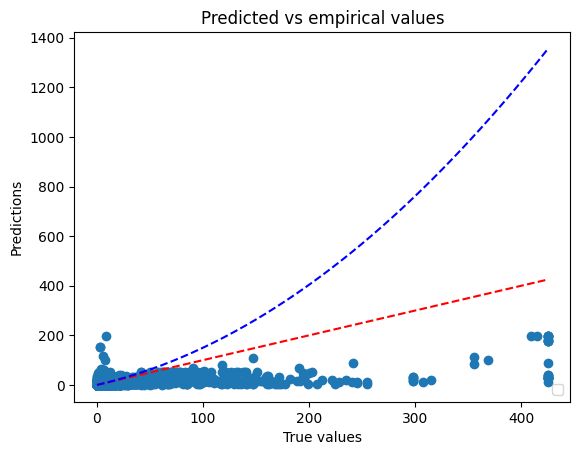

In [53]:
evaluate_model_regression(XGB1_fitted, y , X )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MSE= 11.012992356940696
r2= 0.19714996758292125
MAPE= 264.6624139135458
RMSE= 3.3185828838437494
RMSPE= 999.5798032853063


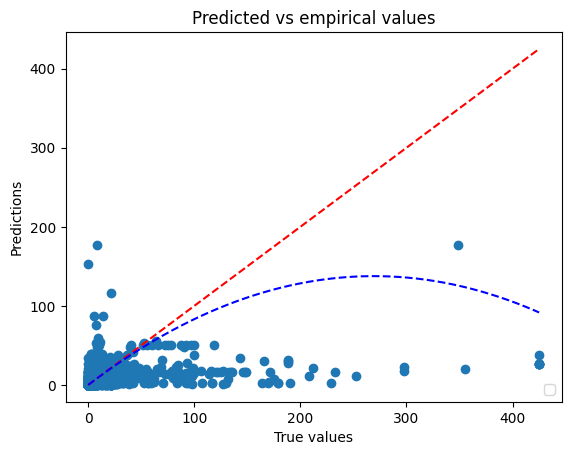

In [54]:
evaluate_model_regression(XGB1_fitted, y_test , X_test )

We can see models not performing very well on two different clusters of data (low and high prices)
We will now split the data into two buckets and build two separate models

### 2nd approach

In [55]:
train_1 = train[train['size']=="infrequent"]
train_2 = train[train['size']!="infrequent"]
test_1 = test[test['size']=="infrequent"]
test_2 = test[test['size']!="infrequent"]

In [56]:
## Data part 1: infrequent screen size
## we need to remove size from features list as it has a constant value for all the observations

In [57]:
selected_variables_1 = selected_variables.copy()
selected_variables_1.remove("size")

In [58]:
test['size'].value_counts(), test_1['size'].value_counts(), test_2['size'].value_counts()

(size
 320x50        210250
 728x90         25698
 infrequent      7796
 Name: count, dtype: int64,
 size
 infrequent    7796
 Name: count, dtype: int64,
 size
 320x50    210250
 728x90     25698
 Name: count, dtype: int64)

In [59]:
# we refit the encoder and process the data

In [60]:
enc_1 = OneHotEncoder(handle_unknown='infrequent_if_exist')
X_train_1 = enc_1.fit_transform(train_1[selected_variables_1])
y_train_1 = train_1['winBid']
X_test_1 = enc_1.transform(test_1[selected_variables_1])
y_test_1 = test_1['winBid']

In [61]:
## Data part 2: other screens


In [62]:
X_train_2 = enc.transform(train_2[selected_variables])
y_train_2 = train_2['winBid']


X_test_2 = enc.transform(test_2[selected_variables])
y_test_2 = test_2['winBid']

In [63]:
X_train_1.shape, X_test_1.shape, X_train_2.shape, X_test_2.shape

((18114, 116), (7796, 116), (550620, 135), (235948, 135))

In [64]:
%%time
XGB1 = GradientBoostingRegressor()
XGB_fitted_data1 = XGB1.fit(X_train_1, y_train_1)

CPU times: user 1.89 s, sys: 0 ns, total: 1.89 s
Wall time: 1.89 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MSE= 379.20465902289914
r2= 0.26723896729668495
MAPE= 713.4252757776317
RMSE= 19.47317793845933
RMSPE= 286.03626316007535


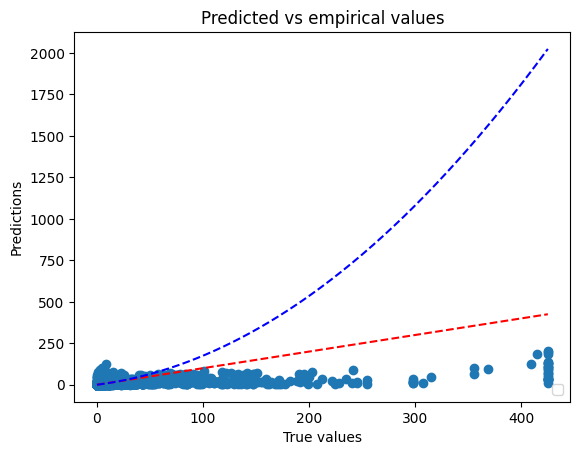

In [65]:
evaluate_model_regression(XGB_fitted_data1, y_train_1 , X_train_1 )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MSE= 335.42301107218486
r2= 0.13110985095784633
MAPE= 869.0834460143789
RMSE= 18.314557353978962
RMSPE= 290.1008303182183


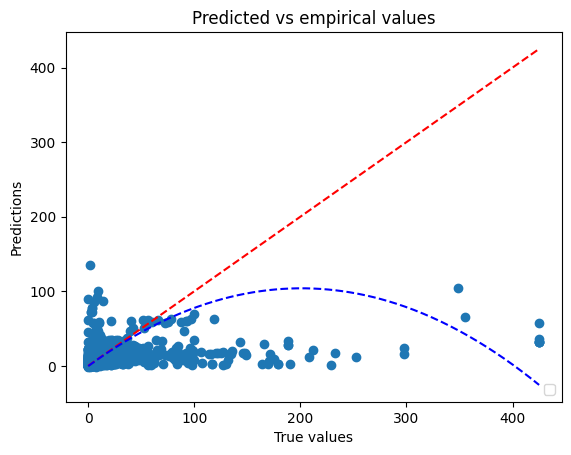

In [66]:
evaluate_model_regression(XGB_fitted_data1, y_test_1 , X_test_1 )

In [67]:
%%time
XGB1 = GradientBoostingRegressor()
XGB_fitted_data2 = XGB1.fit(X_train_2, y_train_2)

CPU times: user 1min 35s, sys: 2.27 s, total: 1min 38s
Wall time: 1min 38s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MSE= 0.1660612951058685
r2= 0.17619666743164364
MAPE= 230.61698938238106
RMSE= 0.4075061902669314
RMSPE= 302.68042974102167


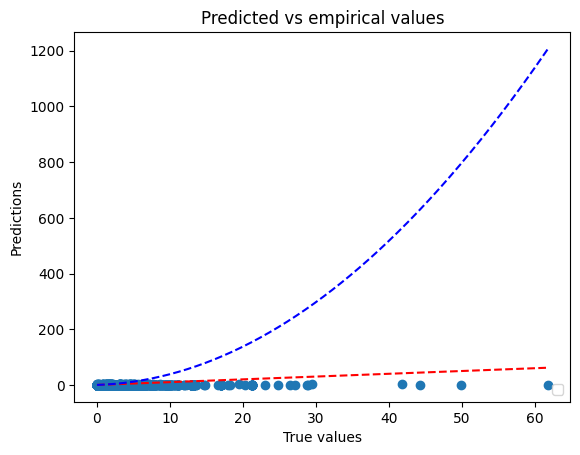

In [68]:
evaluate_model_regression(XGB_fitted_data2, y_train_2 , X_train_2 )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MSE= 0.15994276235545676
r2= 0.1774011099307864
MAPE= 213.55766438099485
RMSE= 0.3999284465444497
RMSPE= 297.6259804613462


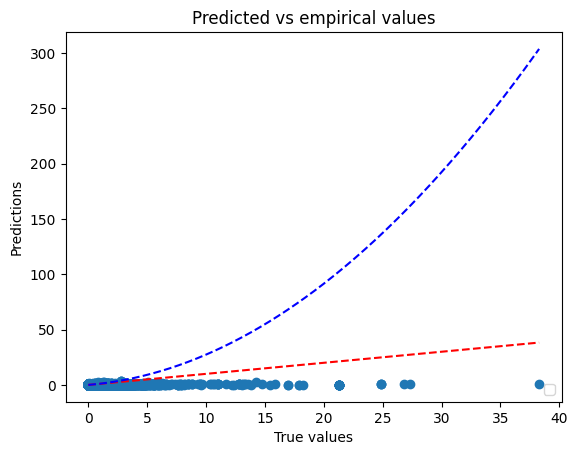

In [69]:
evaluate_model_regression(XGB_fitted_data2, y_test_2 , X_test_2 )

Comparison of scores from the joint data set and two seprate models shows a visible decrease in MAPE and MSE. Splitting th data in two buckets was a good idea

### getting and evaluating final predictions
Evaluate joint results of both models on full sets to compare with the original model

In [72]:
def combine_predictions(model1, model2, data1, data2):
    pred_1 = model1.predict(data1)
    pred_2 = model2.predict(data2)
    merged_preds = np.concatenate((pred_1, pred_2))
    return merged_preds

def replace_values(x):
    if x < 0:
        return 0 
    else:
        return x     

In [73]:
merged_preds_train= combine_predictions(XGB_fitted_data1, XGB_fitted_data2, X_train_1, X_train_2)
merged_preds_test= combine_predictions(XGB_fitted_data1, XGB_fitted_data2, X_test_1, X_test_2)


In [74]:
merged_y_train = pd.concat([y_train_1, y_train_2])
merged_y_test = pd.concat([y_test_1, y_test_2])

In [75]:
MSE=mean_squared_error(merged_y_train, merged_preds_train)
RMSPE = np.sqrt(MSE) / np.mean(y)*100
RMSE = np.sqrt(MSE)
r2=r2_score(merged_y_train, merged_preds_train)
mape=MAPE(merged_y_train, merged_preds_train)
print("Results on train")
print("MSE=", MSE)
print("r2=", r2)
print("MAPE=", mape)
print("RMSE=", RMSE)
print("RMSPE=", RMSPE)

Results on train
MSE= 12.238322069459516
r2= 0.3219990195216871
MAPE= 245.99428228163362
RMSE= 3.49833132642686
RMSPE= 1007.6557307054192


In [76]:
merged_y_test = merged_y_test.apply(replace_values)

In [77]:
MSE=mean_squared_error(merged_y_test, merged_preds_test)
RMSPE = np.sqrt(MSE) / np.mean(y)*100
RMSE = np.sqrt(MSE)
r2=r2_score(merged_y_test, merged_preds_test)
mape=MAPE(merged_y_test, merged_preds_test)
print("Results on test")
print("MSE=", MSE)
print("r2=", r2)
print("MAPE=", mape)
print("RMSE=", RMSE)
print("RMSPE=", RMSPE)

Results on test
MSE= 10.883123150563701
r2= 0.20661746680297133
MAPE= 234.52424814762645
RMSE= 3.298957888570829
RMSPE= 950.2284122326242


Results on train and test sets are similar, there is no sign of overfitting


## Final prediction on test data
Generating final output on the test data unknown to the model

In [ ]:
ft=prepare_data(final_test)

In [ ]:
ft_1 = ft[ft['size']=="infrequent"]
ft_2 = ft[ft['size']!="infrequent"]

In [ ]:
X_ft_1 = enc_1.transform(ft_1[selected_variables_1])

In [ ]:
X_ft_2 = enc.transform(ft_2[selected_variables])

In [ ]:
merged_preds_ft= combine_predictions(XGB_fitted_data1, XGB_fitted_data2, X_ft_1, X_ft_2)

In [ ]:
output = pd.DataFrame({'deviceId': pd.concat([ft_1['deviceId'], ft_2['deviceId']]),
                       'winBid': merged_preds_ft})

In [ ]:
output.loc[output['winBid'] < 0, 'winBid'] = 0
output.head()

In [ ]:
#output.to_csv('output.csv')